In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,5]
import dtutil.configs as dtc

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

import io

In [7]:
csv_data = """
Year,TimeBasedRevenue,ExcessPiracy,CurrencyAdjustment,Core
2011,16.751113,0.0,0.0,16.751113
2012,19.750918,3.090326,0.0,16.660592
2013,19.693586,2.181408,0.0,17.512178
2014,20.444708,1.54445899,-0.047266880000000025,18.947515890000002
2015,19.929498,0.25002999,-0.7000651099999998,20.37953312
2016,20.603365670000002,0.0,-0.38779643465562835,20.99116210465563
2017,22.06277,0.175,-0.14869509999999997,22.0364651
"""
df = pd.read_csv(io.StringIO(csv_data))
df

,Year,TimeBasedRevenue,ExcessPiracy,CurrencyAdjustment,Core
0,2011,16.751113,0.000000,0.000000,16.751113
1,2012,19.750918,3.090326,0.000000,16.660592
2,2013,19.693586,2.181408,0.000000,17.512178
3,2014,20.444708,1.544459,-0.047267,18.947516
4,2015,19.929498,0.250030,-0.700065,20.379533
5,2016,20.603366,0.000000,-0.387796,20.991162
6,2017,22.062770,0.175000,-0.148695,22.036465


### Line Plots

This gives a quick overview of the options but you can see [more details here](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.03-Line-Plots/)

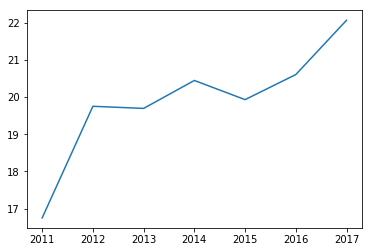

In [8]:
plt.plot(df.Year, df.TimeBasedRevenue)  # x as first argument, y as second

Setting line type and color

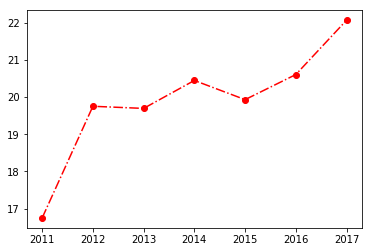

In [9]:
plt.plot(df.Year, df.TimeBasedRevenue, color='red', linestyle='-.', marker='o');

Multiple curves are plotted as separate plot calls

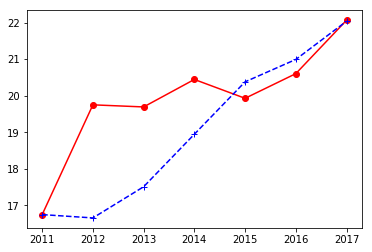

In [10]:
plt.plot(df.Year, df.TimeBasedRevenue, color='red', linestyle='-', marker='o')
plt.plot(df.Year, df.Core, color='blue', linestyle='--', marker='+');

## Generic Settings

These are the commands that apply to all graph types

### Setting Size

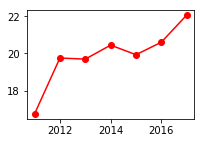

In [11]:
fig = plt.gcf()
fig.set_size_inches(3,2)
plt.plot(df.Year, df.TimeBasedRevenue, color='red', linestyle='-', marker='o')

### Labeling Graph

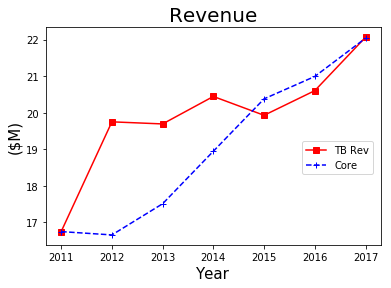

In [12]:
plt.plot(df.Year, df.TimeBasedRevenue, color='red', linestyle='-', marker='s')
plt.plot(df.Year, df.Core, color='blue', linestyle='--', marker='+')
plt.legend(['TB Rev', 'Core'], bbox_to_anchor=[.75, .5])
plt.title('Revenue', size=20)
plt.ylabel('($M)', size=15)
plt.xlabel('Year', size=15);

### Multiple Graphs

You can create a grid of graphs by using subplots

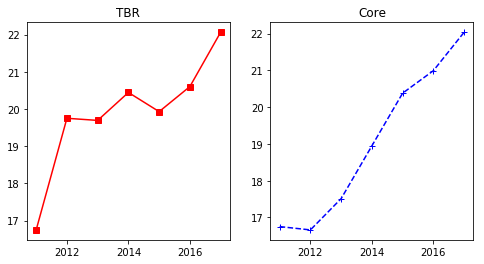

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)  # (num_rows, num_columns)
fig.set_size_inches(8,4)
ax1.plot(df.Year, df.TimeBasedRevenue, color='red', linestyle='-', marker='s')  # plot to the axis rather than plt
ax1.set_title('TBR')  # note for axes you have to call set_title instead of title
ax2.set_title('Core')
ax2.plot(df.Year, df.Core, color='blue', linestyle='--', marker='+');

If you want to iterate through data to create multiple charts, then plotting against the axes is not convenient so you can also set the subplot.

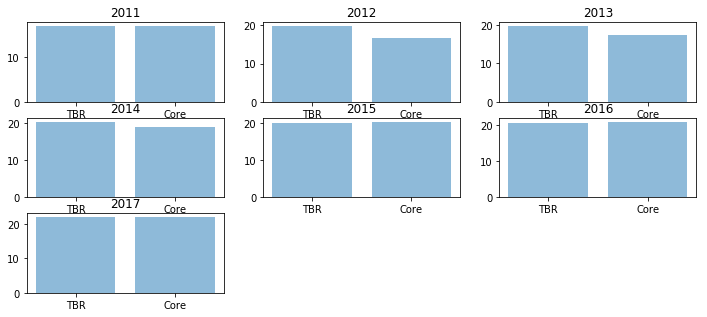

In [14]:
num_years = len(df)
columns = 2
rows = int(num_years/3 +1)
plt.figure(1, figsize=(12, rows*4))  # 14 wide, 3 high per column
row = 0
for i in range(num_years):
    plt.subplot(num_years, 3, i + 1)  # 3 is number of columns, i+1 is graph index (1-based)
    row = df.iloc[i]
    x = [0, 1]
    y = [row.TimeBasedRevenue, row.Core]
    plt.bar(x, y, align='center', alpha=0.5)
    plt.title(int(row.Year))
    plt.xticks(x)
    plt.gca().set_xticklabels(['TBR', 'Core'])  # not sure why gca() is needed here
plt.show()

## Bar Charts

I've always found bar charts a big harder than line plots as you tend not to plot x-y data but rather need to create the x-axis as a integer range variable.  Then you need to specify an offset if you want the labels in the middle of the bars.  My tip for this is to not hesitate creating intermediate variables for convenience ot make things simpler.

### Verical Bars    

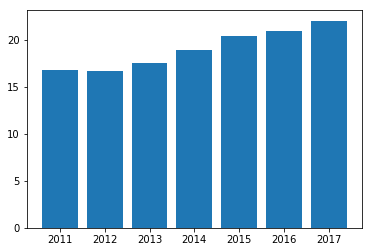

In [44]:
fig, ax = plt.subplots()
plt.bar(range(len(df)), df.Core)
ax.set_xticks(range(len(df)))  # if we don't do this the labels end up off by one!
ax.set_xticklabels(df.Year);

We can change the width of the bars easily, the ratio is related to our x-axis bar spacing which in this case is 1.

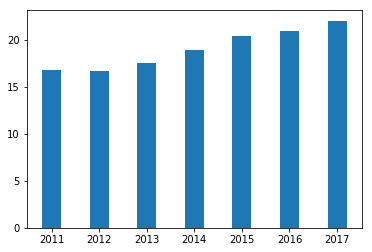

In [34]:
fig, ax = plt.subplots()
#plt.bar(range(len(df)), df.Core, width=.4)
ax.bar(range(len(df)), df.Core, width=.4)
ax.set_xticks(range(len(df)))  # if we don't do this the labels end up off by one!
ax.set_xticklabels(df.Year);

Ading the text labels to the data, plot by returning the rects and then sending through a fucntion.  

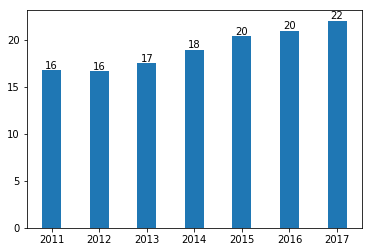

In [19]:
fig, ax = plt.subplots()
rects = ax.bar(range(len(df)), df.Core, width=.4) #get the rects back from the ax
ax.set_xticks(range(len(df)))  # if we don't do this the labels end up off by one!
ax.set_xticklabels(df.Year);

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)

Next, lets plot two sets of data next to each other. 

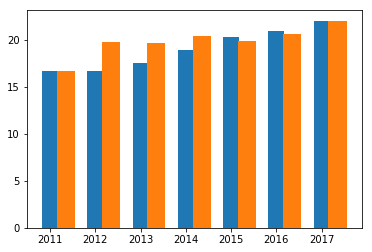

In [51]:
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(df))
plt.bar(x, df.Core, width)
#for the second plot, need to offset the x by a bit, the numpy arrange made this easier than the range object.   
plt.bar(x+width, df.TimeBasedRevenue, width=.4)
ax.set_xticks(range(len(df)))  # if we don't do this the labels end up off by one!
ax.set_xticklabels(df.Year);
#need to get the xticks centered


You might want to make stacked. You plot both and set the bottom of the second to the first set. 

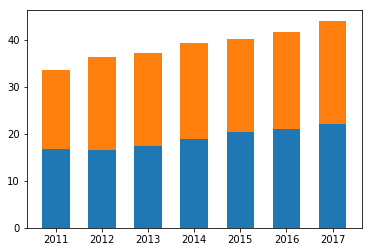

In [56]:
fig, ax = plt.subplots()
width = 0.6
x = np.arange(len(df))
plt.bar(x, df.Core, width)
#for the second plot, need to offset the x by a bit, the numpy arrange made this easier than the range object.   
plt.bar(x, df.TimeBasedRevenue, width, bottom=df.Core )
ax.set_xticks(range(len(df)))  # if we don't do this the labels end up off by one!
ax.set_xticklabels(df.Year);
#need to get the xticks centered

Part of what makes plotting in hard to learn in python is there are so many different API's to plot data. To make this worse, most of the information you see online will use confusing terminology regarding which API you are using. For example, I found this on StackOverflow as a matplotlib example.

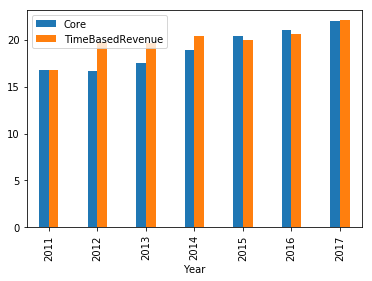

In [73]:
df.plot(x='Year', y=['Core', 'TimeBasedRevenue'], kind='bar', width=.4);

and while the underlying plot engine for this is matplotlib, this is actually the pandas interface.  You can see that in this case instead of calling the plot() method on the plt object we are calling the plot() method on a dataframe. This API allows us to specify column names of the dataframe which is convenient but as you can see some of the defaults are quite different from the matplotlib chart we generated.  This is something to be aware of.